In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [63]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [61]:
classes = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
MAX_FEATURES = 200000 # number of words in the vocab

In [8]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [9]:
vectorizer.adapt(X.values)

In [10]:
vectorized_text = vectorizer(X.values)

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [12]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [14]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [15]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [17]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 8505s 1s/step - loss: 0.0618 - val_loss: 0.0441
Epoch 2/10
6981/6981 [==============================] - 19890s 3s/step - loss: 0.0444 - val_loss: 0.0394
Epoch 3/10
6981/6981 [==============================] - 7297s 1s/step - loss: 0.0395 - val_loss: 0.0331
Epoch 4/10
6981/6981 [==============================] - 6413s 919ms/step - loss: 0.0351 - val_loss: 0.0318
Epoch 5/10
6981/6981 [==============================] - 5904s 846ms/step - loss: 0.0313 - val_loss: 0.0280
Epoch 6/10
6981/6981 [==============================] - 5913s 847ms/step - loss: 0.0283 - val_loss: 0.0237
Epoch 7/10
6981/6981 [==============================] - 5904s 846ms/step - loss: 0.0248 - val_loss: 0.0213
Epoch 8/10
6981/6981 [==============================] - 5904s 846ms/step - loss: 0.0220 - val_loss: 0.0184
Epoch 9/10
6981/6981 [==============================] - 5895s 844ms/step - loss: 0.0199 - val_loss: 0.0171
Epoch 10/10
6981/6981 [======================

In [18]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

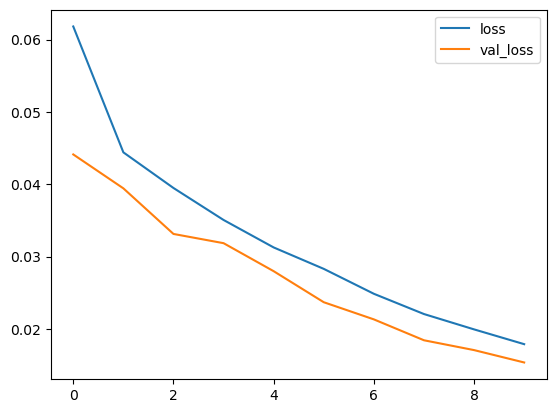

In [19]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [35]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [36]:
input_text_reshaped = np.expand_dims(input_text, axis=0)  # Add a batch dimension

# Now, you can use input_text_reshaped for model.predict
res = model.predict(input_text_reshaped)



1/1 [==============================] - 0s 83ms/step


In [37]:
(res > 0.5).astype(int)

array([[1, 1, 1, 0, 1, 0]])

In [38]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [39]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 141ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [40]:
res.shape

(1, 6)

In [25]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 147ms/step


In [28]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9158667325973511, Recall:0.9430232644081116, Accuracy:0.5295887589454651


In [46]:
model.save('toxicity.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
model = tf.keras.models.load_model('toxicity.h5')

In [48]:
input_str = vectorizer('hey i freaken hate you!')

In [49]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [95]:
print(f"{classes[0]}: {res[0][0] * 10000000:.4f}\n{classes[1]}: {res[0][1] * 10000000:.4f}\n{classes[2]}: {res[0][2] * 10000000:.4f}\n{classes[3]}: {res[0][3] * 10000000:.4f}\n{classes[4]}: {res[0][4] * 10000000:.4f}\n{classes[5]}: {res[0][5] * 10000000:.4f}\n")
res


toxic: 9999868.2737
severe_toxic: 7130772.4714
obscene: 9994313.1208
threat: 20650.2969
insult: 8228098.1541
identity_hate: 80978.5910



array([[0.9999868 , 0.71307725, 0.9994313 , 0.00206503, 0.8228098 ,
        0.00809786]], dtype=float32)